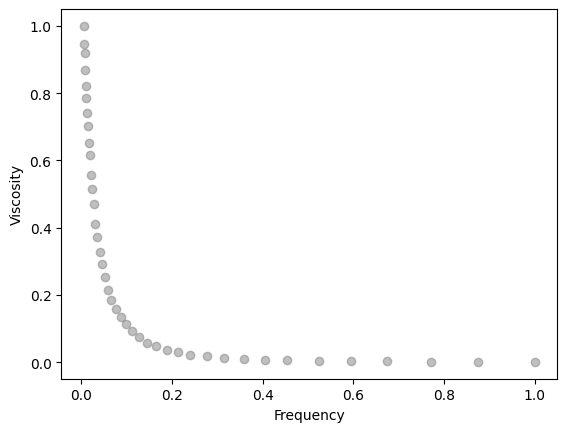

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pylab, csv
import scipy.special
import scipy.integrate
from matplotlib.pyplot import cm
import pickle
import math

with open(r'midPDI.csv') as filename:
        r = list(csv.DictReader(filename))
        xdata = np.array([float(i['freq'])   for i in r])
        ydata = np.array([float(i['visc'])  for i in r])

#normfreq low = 1, mid = 1.3904172952825, high = 1.70551223269977
#normvisc low = 9543683.41377146, mid = 8856490.54424399, high = 6882214.34860969

#Plotted normalized
normfreq = 1.3904172952825
normvisc = 8856490.54424399

xdata = (np.asarray(xdata))/normfreq
plt.xlabel('Frequency')
ydata = np.asarray(ydata)/normvisc
plt.ylabel('Viscosity')

pylab.scatter(xdata,ydata,color='gray',alpha=0.5)

1.2070739086721387 -29.32996742942602 -0.08391326939776375


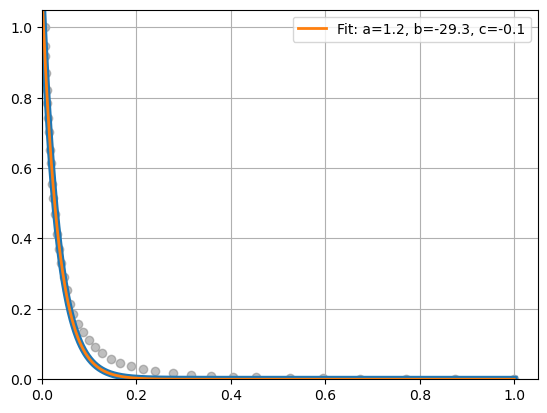

In [58]:
pylab.scatter(xdata,ydata,color='gray',alpha=0.5)

def PDIfitfunction(x,a,b,c):
    return a*(np.exp((((b*x)+c))))

popt, pcov = curve_fit(PDIfitfunction,xdata,ydata, maxfev=1500)
a,b,c = popt

x = np.linspace(0,1,1000)
pylab.plot(x,PDIfitfunction(x,*popt),linewidth=5)
pylab.plot(x,a*(np.exp((((b*x)+c)))),linestyle="-",linewidth=2,label="Fit: a={:2.1f}, b={:2.1f}, c={:2.1f}".format(a,b,c))

pylab.grid()
pylab.xlim(0,1.05)
pylab.ylim(0,1.05)
pylab.legend()

print(a,b,c)
